In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
api = '76540e8276fea01b3fe196deac9404e4'
company = 'AAPL'

In [12]:
def stockpriceanalysis(stock):
    price = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/{stock}?serietype=line&apikey={api}')
    price = price.json()
    
    price = price['historical'][0:-100]
    df = pd.DataFrame.from_dict(price)
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index)
    
    df['20MA'] = df['close'].rolling(20).mean()
    df['250MA'] = df['close'].rolling(250).mean()
    
    df[['close', '20MA', '250MA']].plot(figsize = (12, 10))
    plt.grid(True)
    plt.title(stock + ' Moving Average')
    plt.axis('tight')
    plt.ylabel('Price')
    

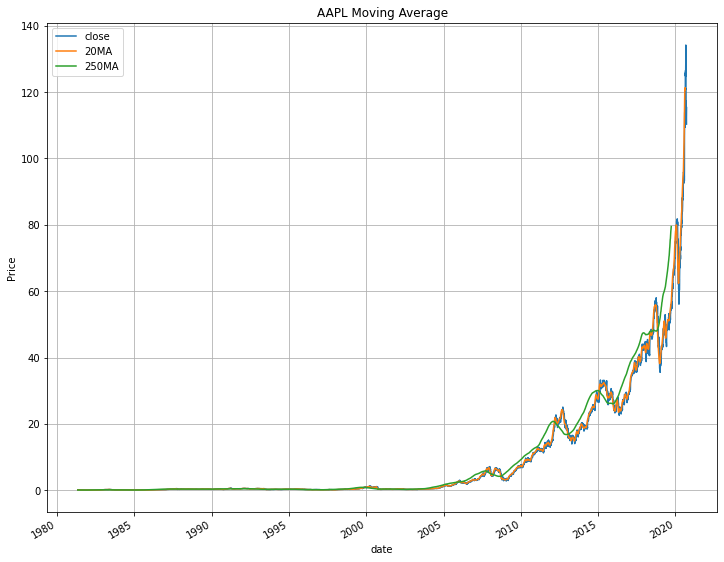

In [13]:
stockpriceanalysis('AAPL')